# PIL library is used for graphical representation of image.
# cv2 is used for image processing
# matplotlib is used for graph
# google.colab.patches to show images

In [3]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def PrintImg(name):
  img = cv2.imread(name)
  cv2_imshow(img)


# Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Change current directory to drive/MyDrive/ML/Classification/Testing/Uploads

In [6]:
%cd gdrive/MyDrive/ML/Classification/Testing/Uploads

/content/gdrive/MyDrive/ML/Classification/Testing/Uploads


# Tensorflow used to run trained model and classify image.

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


# Saved location of the model.

In [8]:
TrainedTFModelPath = '../../model.tflite'

# Interpeter object of the model. It will help in classify the image.

In [9]:
TFModelInterpreter = tf.lite.Interpreter(model_path=TrainedTFModelPath)

#Getting a signature list of the model.
Note down the inputs and outputs for further use.

{'serving_default': {'inputs': ['rescaling_7_input'], 'outputs': ['dense_7']}}

In [10]:
Signs = TFModelInterpreter.get_signature_list()
INPUT = Signs["serving_default"]["inputs"][0]
OUTPUT = Signs["serving_default"]["outputs"][0]

print(INPUT, OUTPUT)

rescaling_7_input dense_7


# Let's create a TFClassifier that will classify the image.

In [11]:
TFClassifier = TFModelInterpreter.get_signature_runner('serving_default')
TFClassifier

# It will help in seprate coral and non-coral Images.

Coral.txt outputs the name of coral Images.

NonCoral.txt outputs the name of Non-coral Images.

In [12]:
img_height = 180
img_width = 180

def ClassifyImage(name):
  img = tf.keras.utils.load_img(name,
                                target_size = (img_height, img_width))
  imgArray0 = tf.keras.utils.img_to_array(img)
  imgArray = tf.expand_dims(imgArray0, 0)
  Predection = TFClassifier(rescaling_7_input = imgArray)[OUTPUT]
  Score = tf.nn.softmax(Predection)
  C = open('Coral.txt', 'a')
  NC = open('NonCoral.txt', 'a')



  Result = np.argmax(Score)
  PrintImg(name)
  if Result == 0:
    print("Non-Coral Image")
    NC.write(name + "\n")

    #In case of spereation, To Save Image in Testing/NonCoral folder
    #tf.keras.utils.save_img("../NonCoral/" + name, imgArray0)

  elif Result == 1:
    print("Coral Image")
    C.write(name + "\n")
  
  print("\n")

    #In case of spereation, To Save Image in Testing/NonCoral folder
    #tf.keras.utils.save_img("../Coral/" + name, imgArray0)
    


# Upload the input images and process them into coral and noncoral rquired outputs.

In [14]:
def upload():
  from google.colab import files
  uploaded = files.upload() 
  
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)

    ClassifyImage(name)
  

upload()

Output hidden; open in https://colab.research.google.com to view.

# Use this if you want to classify the images from the folder instead of uploading.

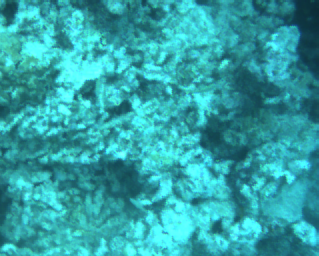

Non-Coral Image




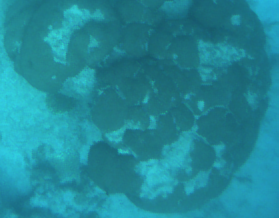

Coral Image




In [ ]:
import os
 
 #Upload all the images in this folder to seprate them into ../Coral and ../NonCoral folder.
path = "./"
dir_list = os.listdir(path)

for name in dir_list:
  ClassifyImage(name)